In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dfa=pd.read_csv("wine_data.csv")
df=pd.read_csv("wine_data.csv",header=None, usecols=[0,1,2])
df.columns=["Class label","Alcohol","Malic Acid"]

In [31]:
df.sample(5)

,Class label,Alcohol,Malic Acid
105,2,12.42,2.55
82,2,12.08,1.13
29,1,14.02,1.68
124,2,11.87,4.31
50,1,13.05,1.73


<Axes: xlabel='Class label', ylabel='Density'>

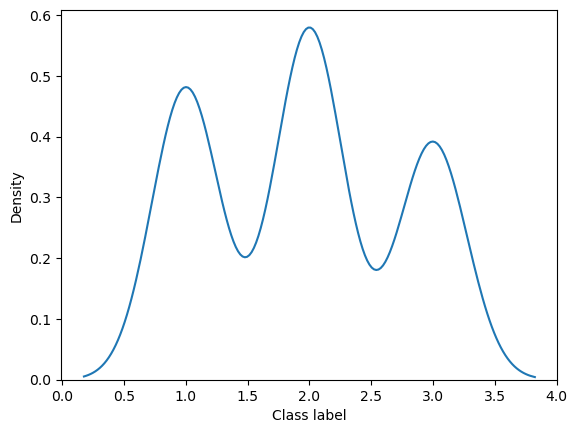

In [32]:
sns.kdeplot(df["Class label"])

<Axes: xlabel='Alcohol', ylabel='Density'>

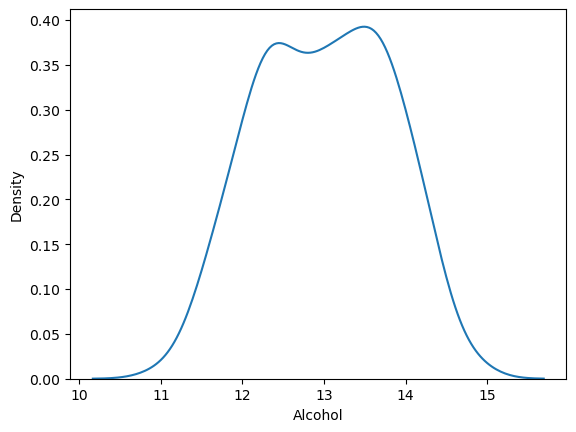

In [33]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic Acid', ylabel='Density'>

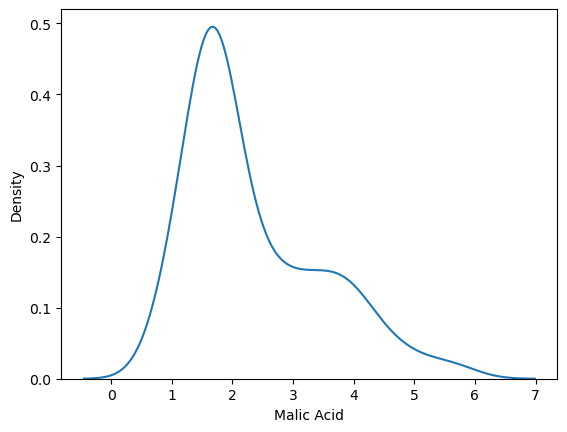

In [34]:
sns.kdeplot(df["Malic Acid"])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

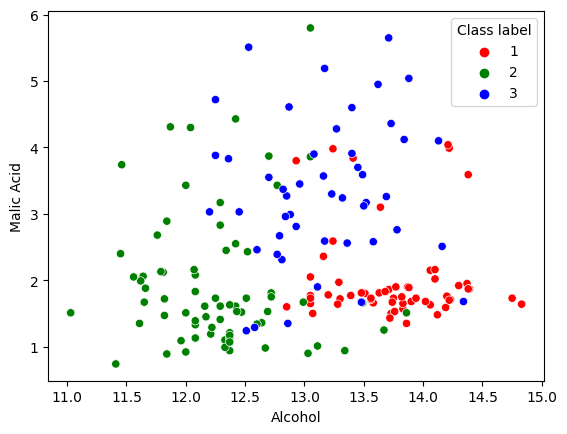

In [36]:
color_dict=["red","green","blue"]
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class label'],palette=color_dict)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(df.drop("Class label",axis=1),df["Class label"],test_size=0.3,random_state=0)

In [40]:
X_train.shape

(124, 2)

In [42]:
X_test.shape

(54, 2)

In [43]:
from sklearn.preprocessing import MinMaxScaler
 
scaler=MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [46]:
X_train_scaled=pd.DataFrame(X_train_scaled ,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [50]:
X_train_scaled.head()

,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [51]:
X_test_scaled.head()

,Alcohol,Malic Acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


In [52]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [53]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


### We can see that Min and Max value before Normalization is 11 and 14 ,After normalization Min and Max values is 1 and 0

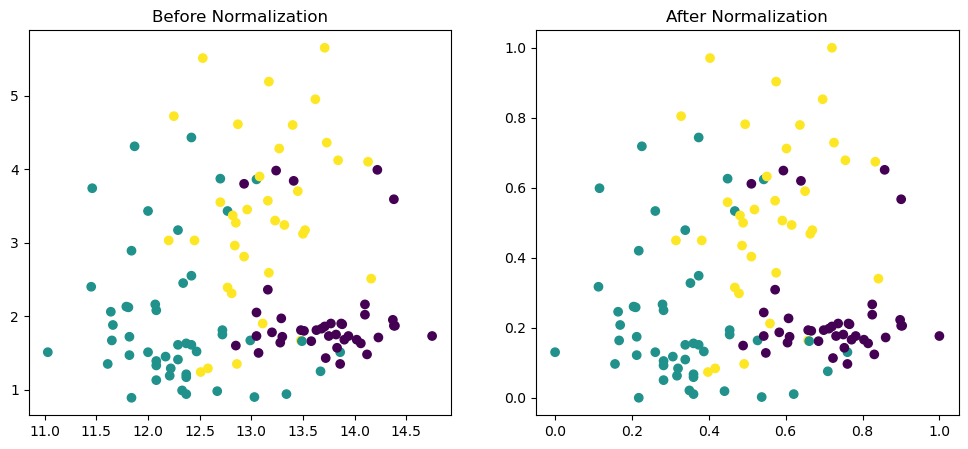

In [60]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Before Normalization
ax1.set_title("Before Normalization")
ax1.scatter(x=X_train["Alcohol"],y=X_train["Malic Acid"],c=Y_train)

#After Normalization
ax2.set_title("After Normalization")
ax2.scatter(x=X_train_scaled["Alcohol"],y=X_train_scaled["Malic Acid"],c=Y_train)

##### You can see that distribution is of data is not chnaging before and after the Normalization

Text(0.5, 1.0, 'After Normalization')

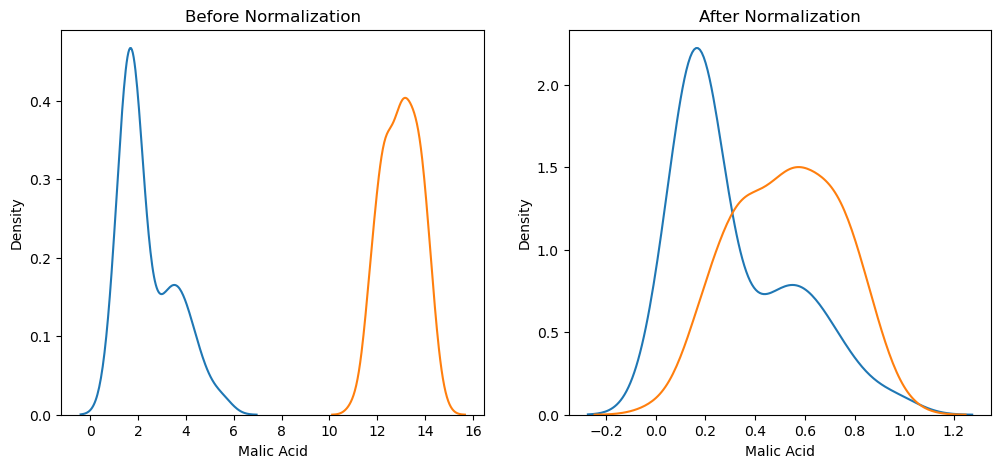

In [65]:
fig, (ax1,ax2)=plt.subplots(ncols=2 ,figsize=(12,5))

#Before Normalization
sns.kdeplot(X_train["Malic Acid"],ax=ax1)
sns.kdeplot(X_train["Alcohol"],ax=ax1)
ax1.set_title("Before Normalization")

#After Normalization
sns.kdeplot(X_train_scaled["Malic Acid"],ax=ax2)
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
ax2.set_title("After Normalization")

##### You can see that After Normalization Values lies closer to each other

Text(0.5, 1.0, 'Distribution After Scalling of Data')

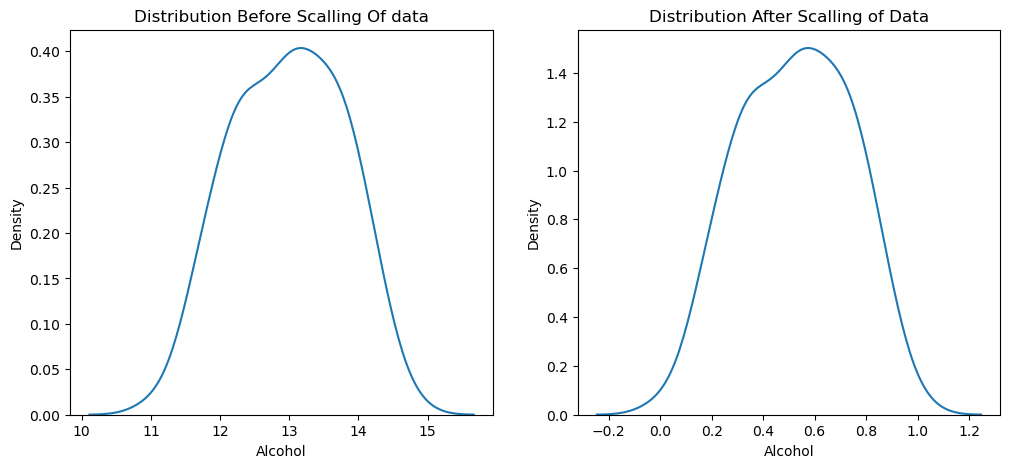

In [67]:
fig, (ax1,ax2)=plt.subplots(ncols=2 ,figsize=(12,5))

#Before Normalization
sns.kdeplot(X_train["Alcohol"],ax=ax1)
ax1.set_title("Distribution Before Scalling Of data")

#After Normalization
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
ax2.set_title("Distribution After Scalling of Data")

Text(0.5, 1.0, 'Distribution After Scalling of Data')

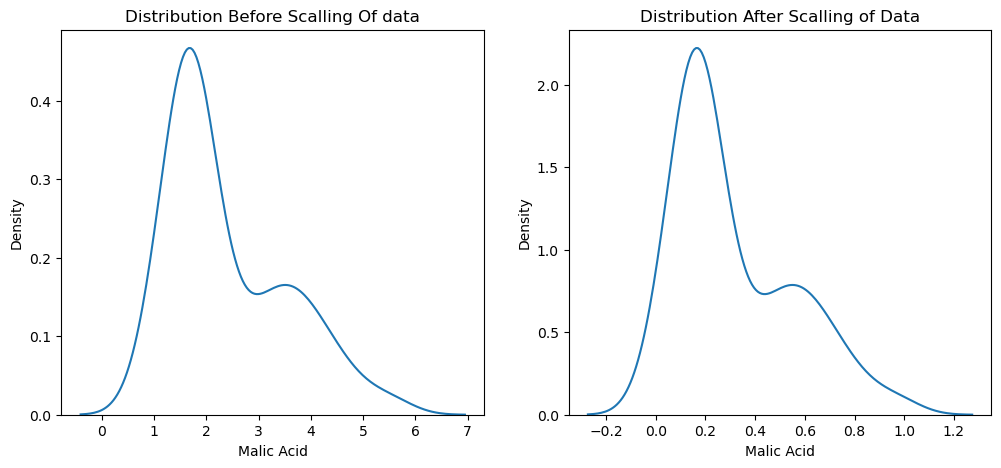

In [68]:
fig, (ax1,ax2)=plt.subplots(ncols=2 ,figsize=(12,5))

#Before Normalization
sns.kdeplot(X_train["Malic Acid"],ax=ax1)
ax1.set_title("Distribution Before Scalling Of data")

#After Normalization
sns.kdeplot(X_train_scaled["Malic Acid"],ax=ax2)
ax2.set_title("Distribution After Scalling of Data")

### Conclude